# 상황

(5, 2)을 지나면서 나머지 점들에 대한 회귀 직선 구하기

# 데이터

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [21]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=1, n_informative=1, noise=20, random_state=0)
X = X.reshape(-1, 1) + 3
y = (y + 20 )/50

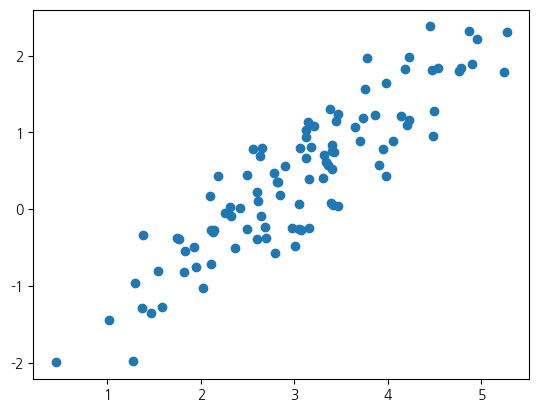

In [22]:
plt.scatter(X, y)

# 방법
- (5, 2)를 원점으로 옮긴다. (모든 점들 평행이동)
- 원점을 지나는 회귀 직선을 구한다.
- 다른 X 데이터에 대해서 똑같이 -5만큼 평행이동 후 회귀 직선에 넣어 나온 값에 +2만큼 평행이동 시킨다.

In [26]:
from sklearn.linear_model import LinearRegression

# 목표 점
x0, y0 = (5, 2)

# 원점으로 옮긴다
X_move = X - x0
y_move = y - y0

# 원점을 지나는 회귀 직선
lr = LinearRegression(fit_intercept=False).fit(X_move, y_move)

# 다른 데이터
xs = np.arange(0, 5.6, 0.1).reshape(-1, 1)
ys = lr.predict(xs - x0) + y0

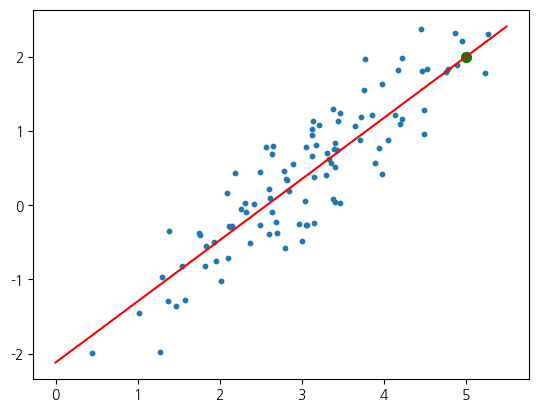

In [32]:
plt.scatter(X, y, s=10)
plt.scatter(x0, y0, s=50, color='green')
plt.plot(xs, ys, color='red')

In [35]:
# 확인
lr.predict([[x0 - x0]]) + y0

array([2.])